# Employee Attrition / Deserción de Empleados

You can find the dataset here: [IBM Employee attrition](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).

**Objectives**:

* Perform exploratory data analysis.
* Discover possible factors that influence job desertion.
* Apply ML models.

## Import Useful Libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#sns.set()
sns.set_palette("pastel")

## Load Data

In [59]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


You can get information about the data [here](http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html#the_data).

## Exploratory Data Analysis

In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.shape

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
col_num = [col for col in data.columns if data[col].dtype == 'int64']
col_obj = [col for col in data.columns if data[col].dtype == 'object']

In [7]:
data_num = data[col_num]
data_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
data_obj = data[col_obj]
data_obj.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Features visualizations

Now, we will observe the distribution of the nominal and ordinal variables in order to understand the data. 

### Categorical Features (Nominal varibles)

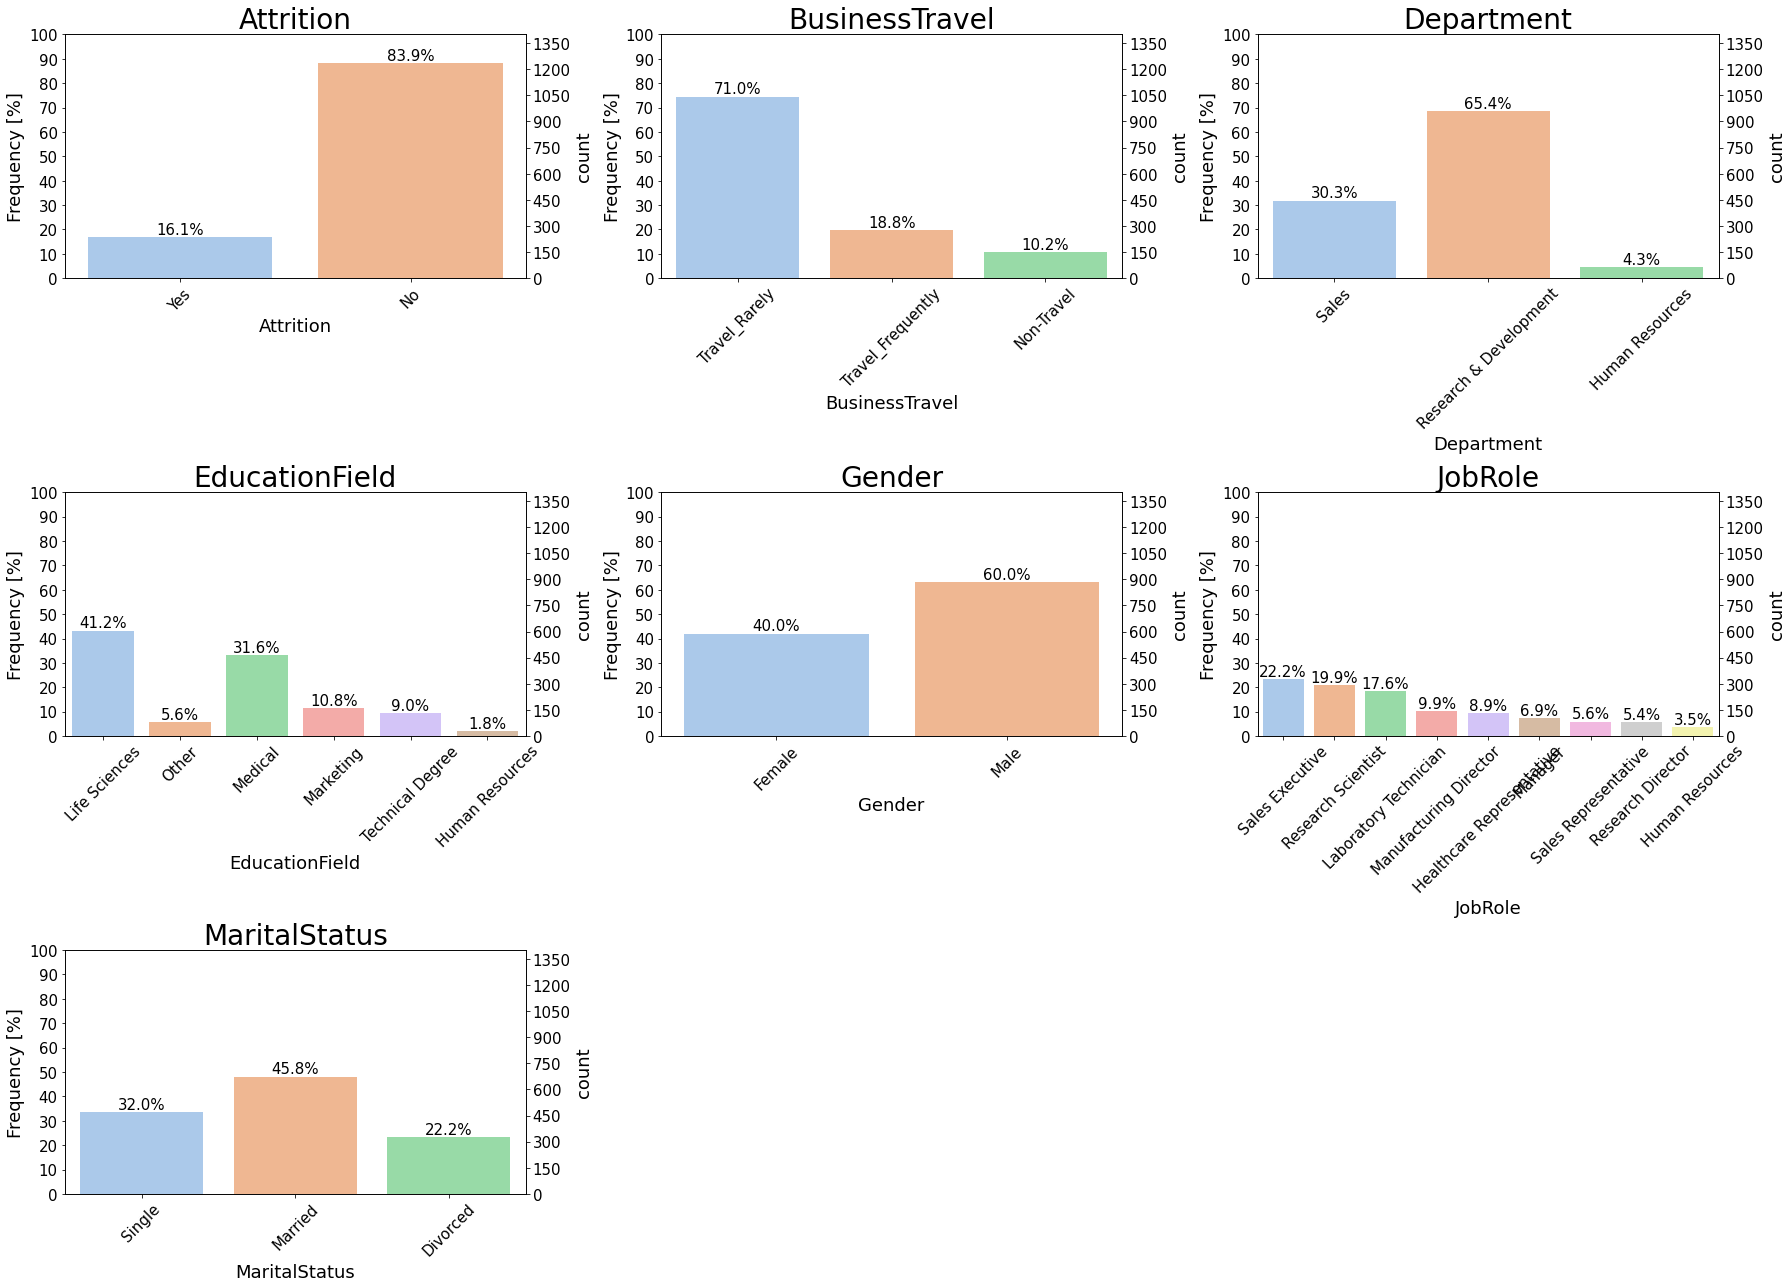

In [89]:
col_cat = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
#Configure some parameters
parameters = {'axes.labelsize': 18,
              'axes.titlesize': 28,
              'xtick.labelsize': 15,
              'ytick.labelsize': 15}
plt.rcParams.update(parameters)

# Total observations-rows
ncount = len(data)

plt.figure(figsize=(25,18))
for i in range(0,7):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x = col_cat[i], data= data)
    plt.title(col_cat[i])
    plt.xlabel(col_cat[i])
    plt.xticks(rotation=45)
  
    # Create a twin axis
    ax0=ax.twinx()

    #If you want: Switch the count axis to the right 
    ax.yaxis.tick_right()
    ax0.yaxis.tick_left()

    #Change labels positions
    ax.yaxis.set_label_position('right')
    ax0.yaxis.set_label_position('left')

    ax0.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=15) # Configuramos alineación del texto.

    # Configure the axis
    ax0.set_ylim(0,100)
    ax.set_ylim(0,1400)

    #  Use a LinearLocator to secure the number ticks
    ax.yaxis.set_major_locator(ticker.MultipleLocator(150))
    ax0.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

plt.show()

### Categorical Features (Ordinal variables)

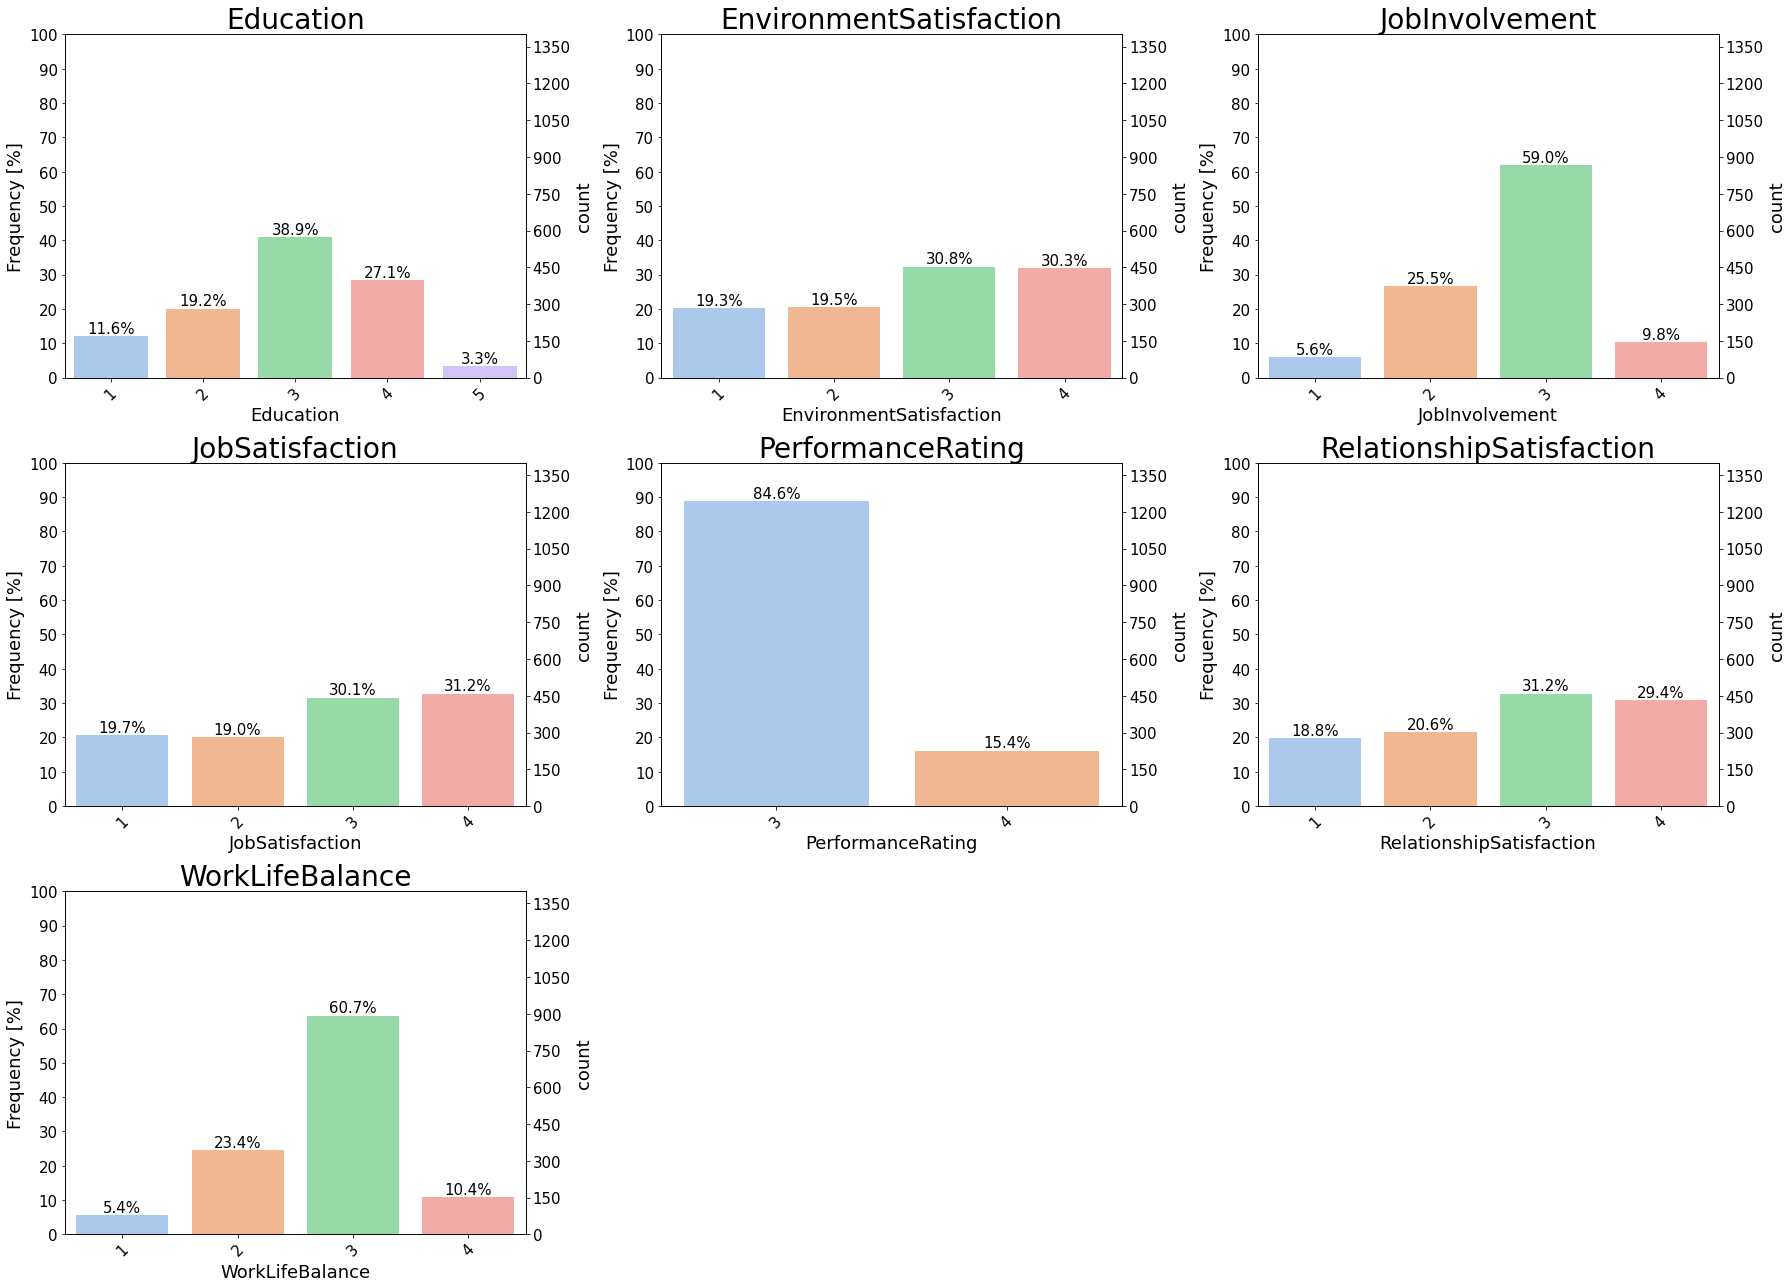

In [91]:
col_ord = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction','PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

#Configure some parameters
parameters = {'axes.labelsize': 18,
              'axes.titlesize': 28,
              'xtick.labelsize': 15,
              'ytick.labelsize': 15}
plt.rcParams.update(parameters)

# Total observations-rows
ncount = len(data)

plt.figure(figsize=(25,18))
for i in range(0,7):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x = col_ord[i], data= data)
    plt.title(col_ord[i])
    plt.xlabel(col_ord[i])
      
    # Create a twin axis
    ax0=ax.twinx()

    #If you want: Switch the count axis to the right 
    ax.yaxis.tick_right()
    ax0.yaxis.tick_left()

    #Change labels positions
    ax.yaxis.set_label_position('right')
    ax0.yaxis.set_label_position('left')

    ax0.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=15) # Configuramos alineación del texto.

    # Configure the axis
    ax0.set_ylim(0,100)
    ax.set_ylim(0,1400)

    #  Use a LinearLocator to secure the number ticks
    ax.yaxis.set_major_locator(ticker.MultipleLocator(150))
    ax0.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

plt.show()

## Some interesting questions

* Is there a relationship between age and employee attrition?

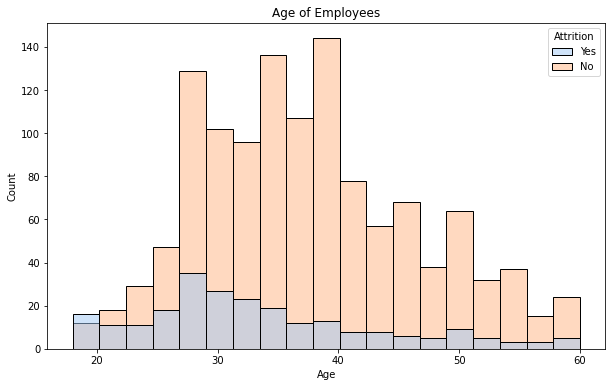

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(x=data.Age, hue = data.Attrition)
plt.title('Age of Employees')
plt.show()

* Is the distance from home relevant?

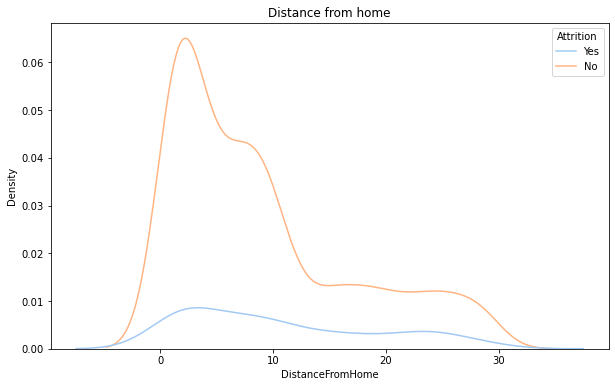

In [20]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='DistanceFromHome',data = data, hue = 'Attrition')
plt.title('Distance from home')
plt.show()

Does a bad work environment influence job desertion?

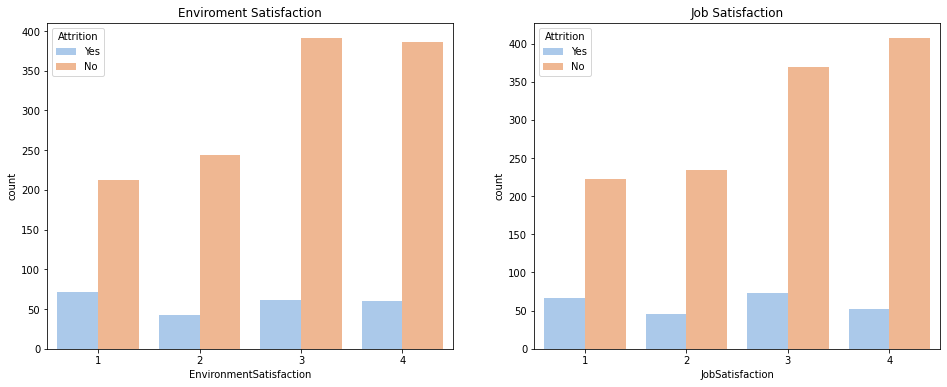

In [37]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='EnvironmentSatisfaction',data = data , hue = 'Attrition')
plt.title('Enviroment Satisfaction')

plt.subplot(1,2,2)
sns.countplot(x='JobSatisfaction',data = data , hue = 'Attrition')
plt.title('Job Satisfaction')
plt.show()

We know that the salary range of an employee depends on their responsibilities. But is there job desertion due to low wages?

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1152x432 with 0 Axes>

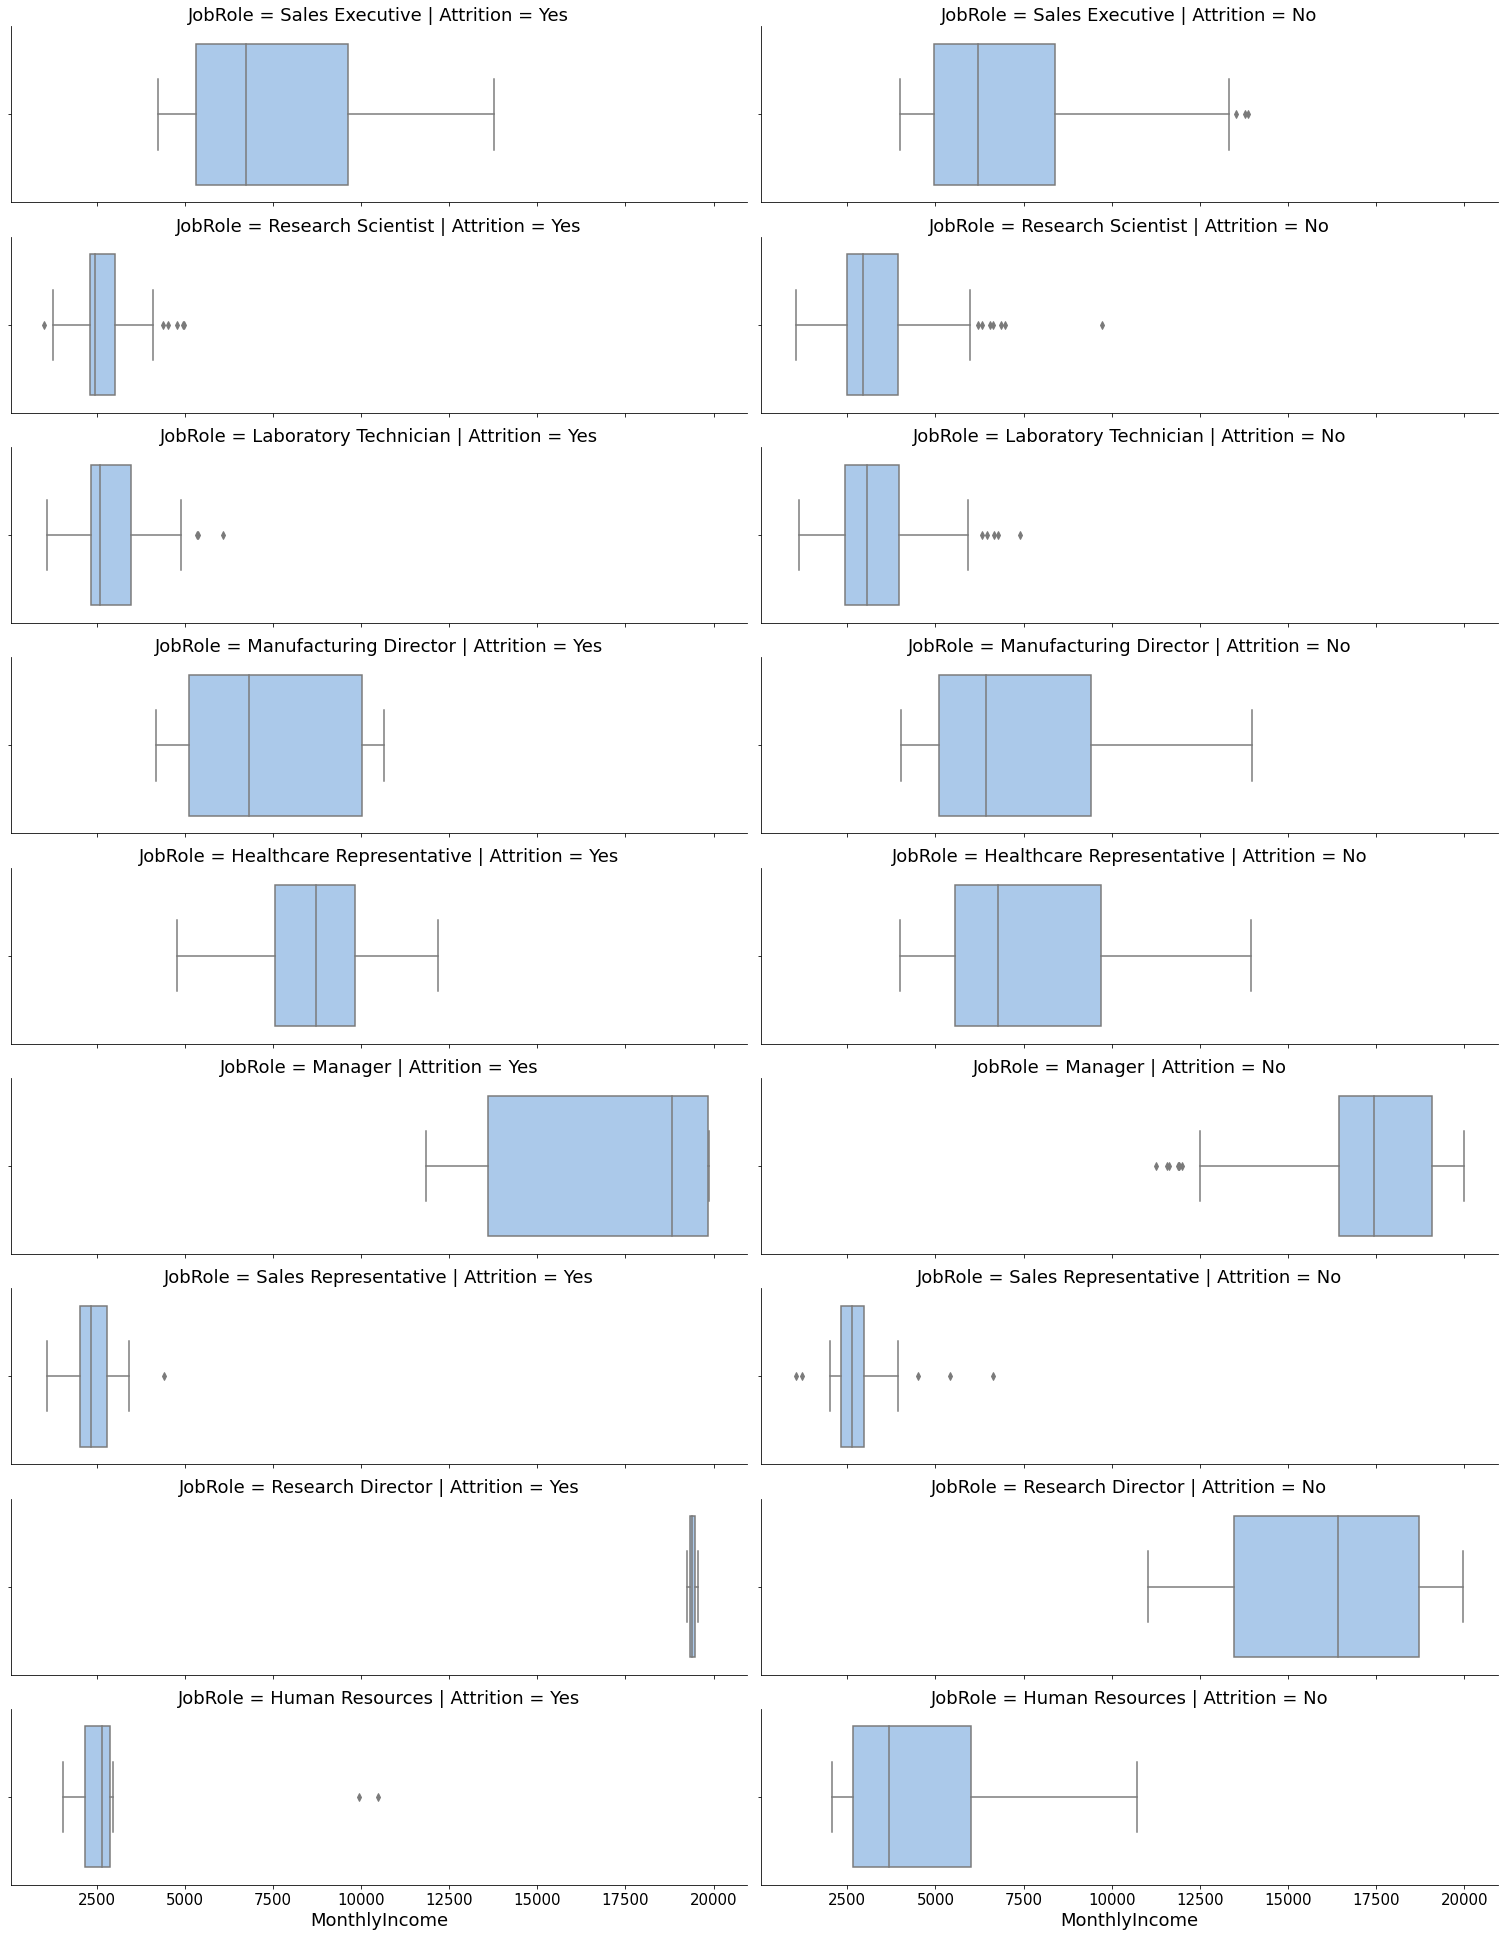

In [47]:
parameters = {'axes.labelsize': 18,
              'axes.titlesize': 28,
              'xtick.labelsize': 15,
              'ytick.labelsize': 15}
plt.rcParams.update(parameters)
plt.figure(figsize=(16,6))
g = sns.FacetGrid(data, row = 'JobRole',height=3, aspect=3.5, col = 'Attrition')
g.map(sns.boxplot, 'MonthlyIncome')
plt.show()

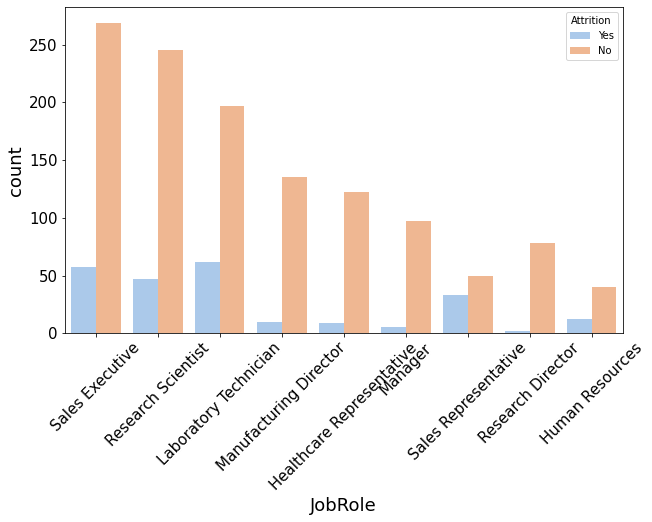

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='JobRole',data = data, hue='Attrition')
plt.xticks(rotation=45)
plt.show()

Is there a relationship between salary range and field of study that implies job desertion?

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1152x432 with 0 Axes>

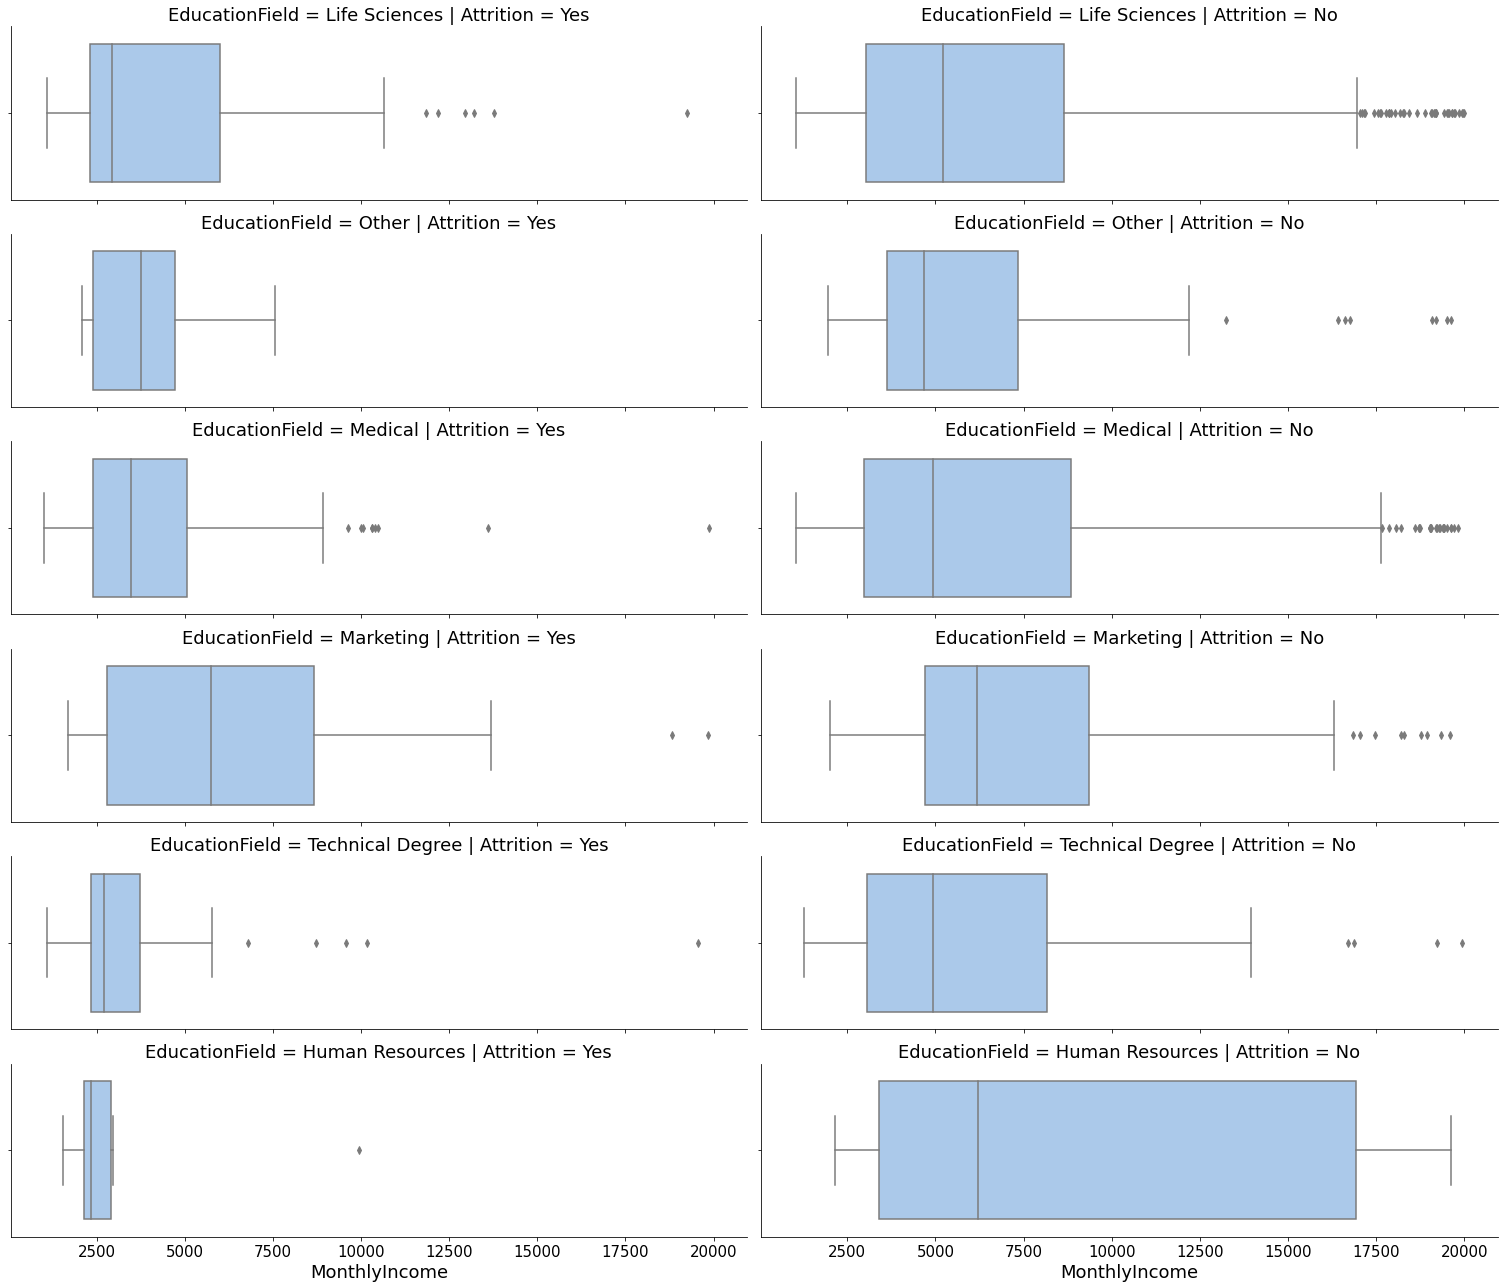

In [48]:
parameters = {'axes.labelsize': 18,
              'axes.titlesize': 28,
              'xtick.labelsize': 15,
              'ytick.labelsize': 15}
plt.rcParams.update(parameters)
plt.figure(figsize=(16,6))
g = sns.FacetGrid(data, row = 'EducationField',height=3, aspect=3.5, col = 'Attrition')
g.map(sns.boxplot, 'MonthlyIncome')
plt.show()

Observations:

* Employees between 26 and 30 years old are the ones who tend to leave the company. In addition, there are two peaks to highlight. One in employees between the ages of 18 and 20, where this attrition may be related to new opportunities. And another spike in 50-year-old employees that may be tied to retirements.

* Most of the employees live around 10km from the company, and there does not seem to be a trend of attrition defined by this factor.

* Employees who leave the company consider the work environment both good and bad, so it may not be a relevant factor.

* Some job roles like Research Scientist, Laboratory Technician and Sales Representative have very low monthly incomes and it is observed that they represent a majority in desertions. So it can be an important factor.

## Feature Engineering

**Drop unuseful columns**: there are some columns with constant value.

In [60]:
data = data.drop(columns = ['EmployeeCount', 'StandardHours', 'Over18'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


**Check missing values**: 

In [64]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**Detecting Outliers**: We shall use the interquartile range method to detect outliers.

In [75]:
columns= ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction',
          'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike','PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
          'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']
print('Values= (q25,q75, IQR, min, max)')
for i,column in enumerate([data.Age, data.DailyRate, data.DistanceFromHome, data.Education,data.EmployeeNumber, data.EnvironmentSatisfaction, data.HourlyRate,
                          data.JobInvolvement, data.JobLevel, data.JobSatisfaction, data.MonthlyIncome, data.MonthlyRate, data.NumCompaniesWorked, data.PercentSalaryHike, 
                          data.PerformanceRating, data.RelationshipSatisfaction,data.StockOptionLevel, data.TotalWorkingYears, data.TrainingTimesLastYear,
                          data.WorkLifeBalance, data.YearsAtCompany, data.YearsInCurrentRole, data.YearsSinceLastPromotion, data.YearsWithCurrManager]):
    q25,q75 = np.percentile(column.values, [25,75])
    iqr = q75 - q25
    miin = q25 - 1.5*iqr
    maax = q75 + 1.5*iqr
    mask = (column < miin) | (column > maax)
    outliers=mask.sum()
    print(f'Values {columns[i]}:',q25,q75,iqr, miin, maax)
    print(f'Total:',outliers)

Values= (q25,q75, IQR, min, max)
Values Age: 30.0 43.0 13.0 10.5 62.5
Count: 0
Values DailyRate: 465.0 1157.0 692.0 -573.0 2195.0
Count: 0
Values DistanceFromHome: 2.0 14.0 12.0 -16.0 32.0
Count: 0
Values Education: 2.0 4.0 2.0 -1.0 7.0
Count: 0
Values EmployeeNumber: 491.25 1555.75 1064.5 -1105.5 3152.5
Count: 0
Values EnvironmentSatisfaction: 2.0 4.0 2.0 -1.0 7.0
Count: 0
Values HourlyRate: 48.0 83.75 35.75 -5.625 137.375
Count: 0
Values JobInvolvement: 2.0 3.0 1.0 0.5 4.5
Count: 0
Values JobLevel: 1.0 3.0 2.0 -2.0 6.0
Count: 0
Values JobSatisfaction: 2.0 4.0 2.0 -1.0 7.0
Count: 0
Values MonthlyIncome: 2911.0 8379.0 5468.0 -5291.0 16581.0
Count: 114
Values MonthlyRate: 8047.0 20461.5 12414.5 -10574.75 39083.25
Count: 0
Values NumCompaniesWorked: 1.0 4.0 3.0 -3.5 8.5
Count: 52
Values PercentSalaryHike: 12.0 18.0 6.0 3.0 27.0
Count: 0
Values PerformanceRating: 3.0 3.0 0.0 3.0 3.0
Count: 226
Values RelationshipSatisfaction: 2.0 4.0 2.0 -1.0 7.0
Count: 0
Values StockOptionLevel: 0.0 1.0 

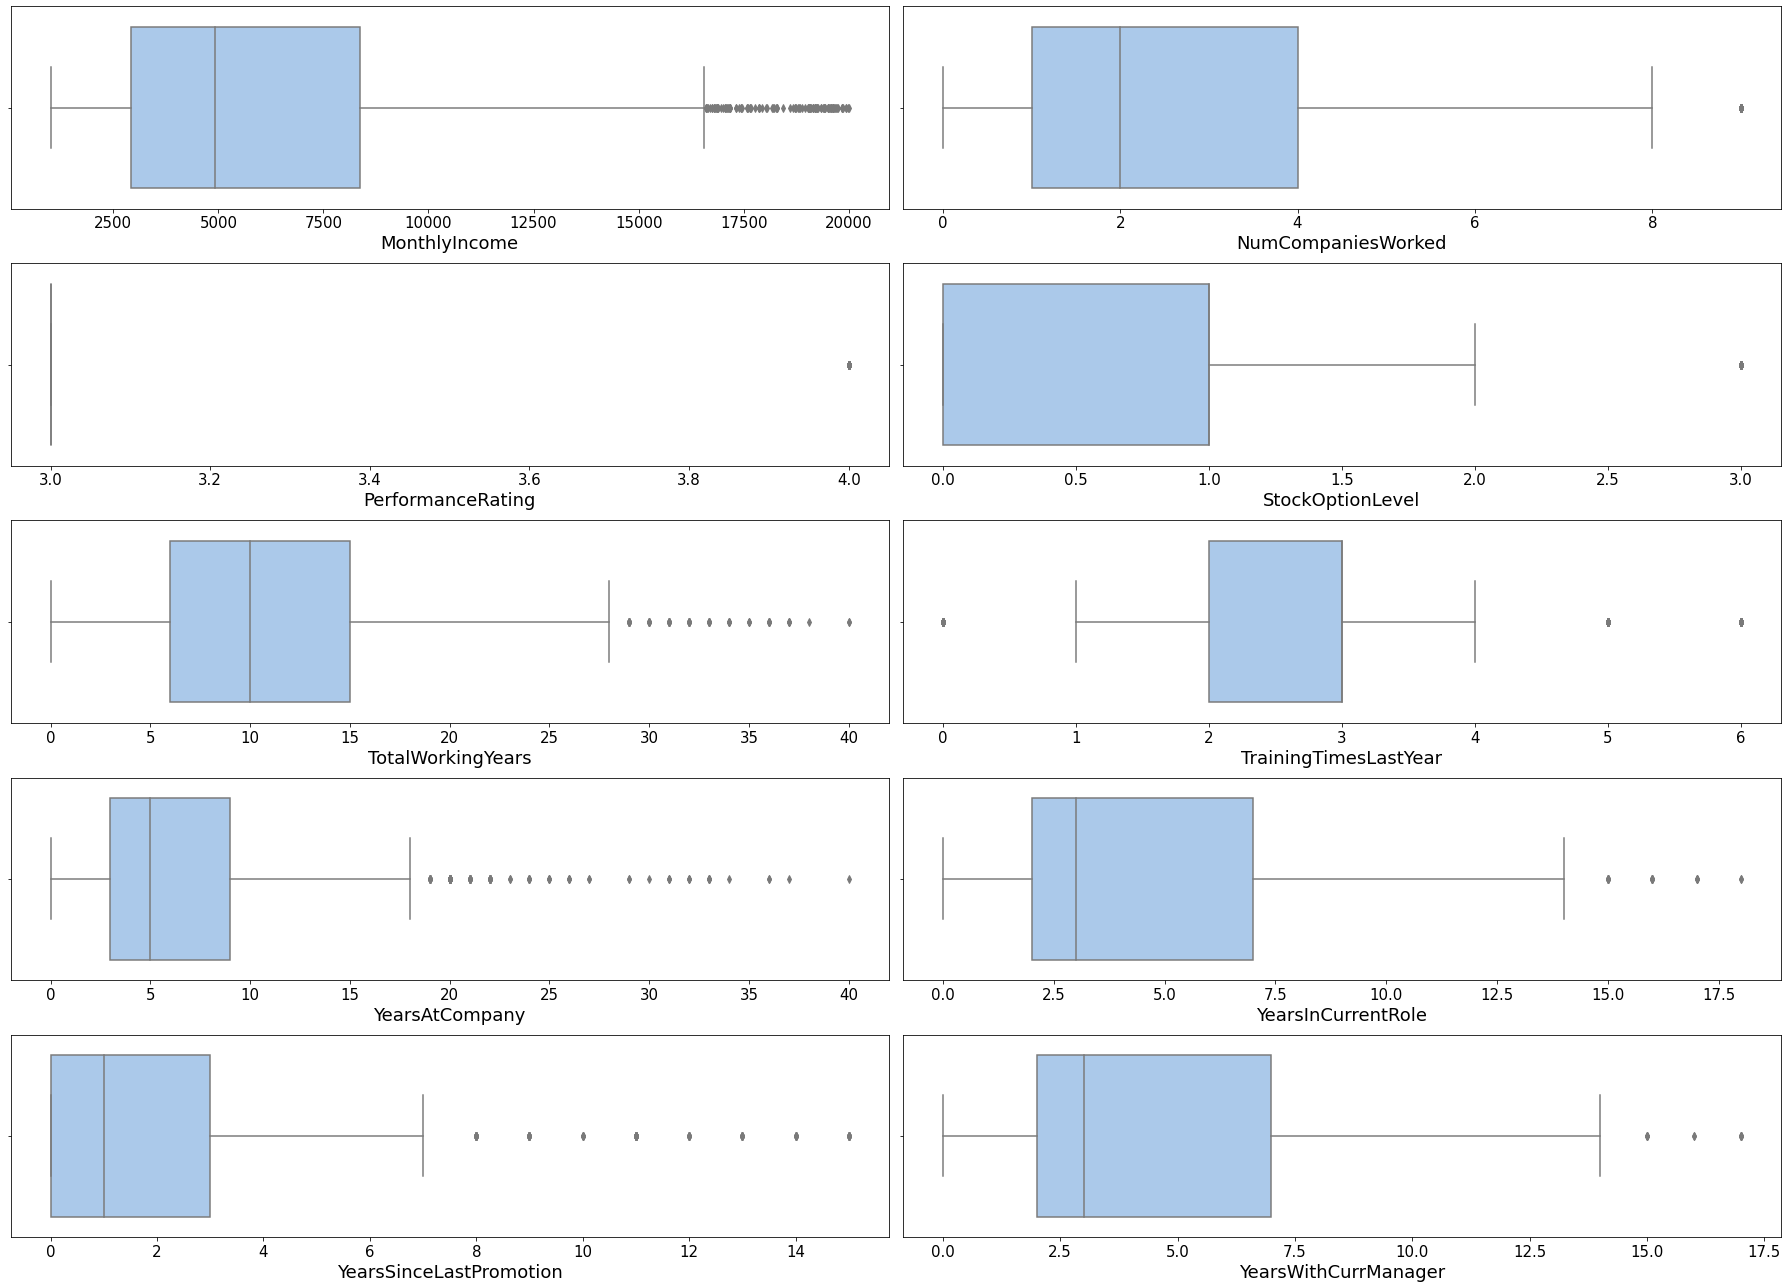

In [87]:
col_outliers = ['MonthlyIncome','NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear',
                              'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
parameters = {'axes.labelsize': 18,
              'axes.titlesize': 28,
              'xtick.labelsize': 15,
              'ytick.labelsize': 15}
plt.rcParams.update(parameters)
plt.figure(figsize=(25,18))
for i in range(0,10):
    plt.subplot(5,2,i+1)
    ax = sns.boxplot(x = col_outliers[i], data= data)
    plt.xlabel(col_outliers[i])
    
plt.tight_layout()

plt.show()

The outliers in each variable represent less than 20% of the total data. Also, we can observe that their presence is due to their nature. For example, high monthly salaries for positions with greater responsibilities or long years in the company for people over 50, which seems consistent. Therefore, it is decided not to eliminate the outliers present.

**Encoding**: 

In [100]:
col_obj = [col for col in data.columns if data[col].dtype == 'object']
col_obj

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [104]:
data["Attrition"] = LabelEncoder().fit_transform(data['Attrition'])
data["BusinessTravel"] = LabelEncoder().fit_transform(data['BusinessTravel'])
data["Department"] = LabelEncoder().fit_transform(data['Department'])
data["EducationField"] = LabelEncoder().fit_transform(data['EducationField'])
data["Gender"] = LabelEncoder().fit_transform(data['Gender'])
data["JobRole"] = LabelEncoder().fit_transform(data['JobRole'])
data["MaritalStatus"] = LabelEncoder().fit_transform(data['MaritalStatus'])
data["OverTime"] = LabelEncoder().fit_transform(data['OverTime'])

In [105]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


## Modeling

**Split the data**:

In [106]:
X = data.drop(columns = ['Attrition'])
y = data[['Attrition']]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = data.Attrition, random_state = 42)

**Metrics**:

In [136]:
def evaluate_model(y_test, y_pred):
    names=['0','1']
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(2,2))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    print(classification_report(y_test, y_pred))

**Benchmark**

In [128]:
def select_model(X_train, X_test, y_train, y_test):
    models=[RandomForestClassifier(n_estimators = 5, random_state=42),
            LogisticRegression(random_state=42, max_iter=10000)]
    model_name = ['Random Forest','Logistic Regression']
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print('Model:', model_name[models.index(model)])
        evaluate_model(y_test, y_pred)

Model: Random Forest


<ipython-input-128-5f33913b0bc7>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


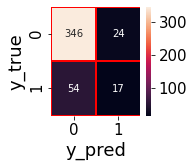

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       370
           1       0.41      0.24      0.30        71

    accuracy                           0.82       441
   macro avg       0.64      0.59      0.60       441
weighted avg       0.79      0.82      0.80       441



C:\Users\vanes\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model: Logistic Regression


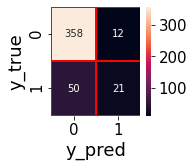

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       370
           1       0.64      0.30      0.40        71

    accuracy                           0.86       441
   macro avg       0.76      0.63      0.66       441
weighted avg       0.84      0.86      0.84       441



In [129]:
select_model(X_train, X_test, y_train, y_test)

Logistic Regression present best performance but we have a imbalanced data and we should consider that.

**Imbalanced data**: In what follows, we will seek to improve the performance of the model considering that the data present a severe imbalance between the classes of the target variable. We can observe a high accuaracy of the model, but a low precision and recall for class 1, and we are interested in better predicting whether an employee wants to leave the company or not. 

C:\Users\vanes\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


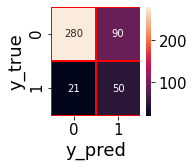

              precision    recall  f1-score   support

           0       0.93      0.76      0.83       370
           1       0.36      0.70      0.47        71

    accuracy                           0.75       441
   macro avg       0.64      0.73      0.65       441
weighted avg       0.84      0.75      0.78       441



In [131]:
lr = LogisticRegression(random_state=42, max_iter=10000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
evaluate_model(y_test, y_pred)

We have a better classification for the class 1 with only consider the "balanced" parameter.

**Optimization**: We will use Gridsearch and Cross Validation techniques in order to improve the model performance.

In [134]:
# Model
lr = LogisticRegression(random_state=42)

#Parameters
param_grid = {'penalty': ['l1', 'l2'],
              'max_iter': [1000, 3000, 5000, 8000, 10000],
              'C': [1,2,4,6,8,10],
              'class_weight': ['balanced']
              }
# GridSearch
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best params: "+str(grid_search.best_params_))
print("Best Score: "+str(grid_search.best_score_)+'\n')

C:\Users\vanes\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mejores parametros: {'C': 2, 'class_weight': 'balanced', 'max_iter': 8000, 'penalty': 'l2'}
Mejor Score: 0.7346909779777409



C:\Users\vanes\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


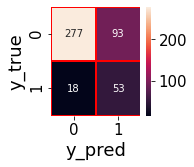

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       370
           1       0.36      0.75      0.49        71

    accuracy                           0.75       441
   macro avg       0.65      0.75      0.66       441
weighted avg       0.85      0.75      0.78       441



In [135]:
lr = LogisticRegression(random_state = 42, C = 2, class_weight = 'balanced', max_iter = 8000, penalty = 'l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
evaluate_model(y_test, y_pred)

### Conclusions:

The fact that our variable to predict presents unbalanced classes leads to a poor performance of the model. However, by adjusting some hyperparameters, we were able to achieve a better prediction of employee attrition. 

In the next iterations, we could try to apply other techniques that consider the imbalance of the data, such as, for example, sub-sampling the majority class or oversampling the minority class by adding new synthetic samples.